# Highway Vehicle Counting Practice Exercise


In this exercise, you will use the YOLO (You Only Look Once) object detection model to analyze a video of highway traffic.
Your task is to count the number of cars that are leaving the highway (coming toward the camera) on the right side and the number of cars that are joining the road on the left side. The video can be found under `Datasets/Example.mp4`.

## Objectives
- Load and process a video using OpenCV.
- Use the YOLO model to detect vehicles in each frame.
- Use OpenCV to manulate the video.
- Track vehicles as they move through the video frames.
- Count the number of vehicles leaving the highway on the right side.
- Count the number of vehicles joining the road on the left side.

## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 18.0 MB/s eta 0:00:00


## Load the YOLO Model

You will first need to load the YOLO model. You can use a pre-trained YOLO model for this task.
Write the code to load the YOLO model below:


In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import Image, display
from IPython import display

In [ ]:
model = YOLO('yolov8n.pt')

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [ ]:
video_path = '/content/Example.mp4'

cap = cv2.VideoCapture(video_path)

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [ ]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:
print(width)
print(height)
print(fps)

1280
720
25


## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes and the counted cars on both sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [ ]:
output_path = '/content/output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

## Process Video Frames and Identify Vehicles on the Right and Left Sides

For each frame in the video, use the YOLO model to detect and track vehicles. You'll need to write a loop that processes each frame and applies the YOLO model.
In each frame, after detecting the vehicles, determine whether they are on the left or right side of the highway.
You can use the position of the bounding boxes provided by YOLO to do this.
* The video should display bounding boxes around the detected objects.
* The video should display the confidence along side with the object id and class id of each detected and tracked object.
* The video display the number of vehicles on the left side.
* The video display the number of vehicles on the right side.
* The video should display the line in which you counted the objects that have crossed it and counted.

In [ ]:
ret, frame = cap.read()

results = model(frame)


0: 384x640 1 car, 1 train, 11.2ms
Speed: 3.9ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


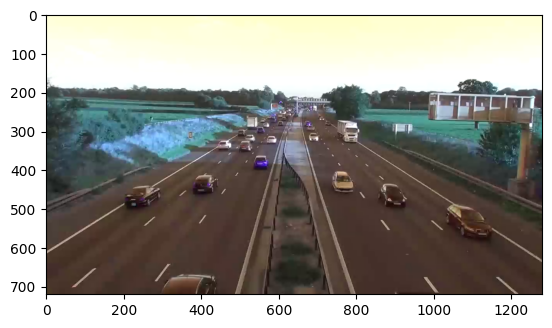

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(frame)

In [ ]:
for result in results:
  print('Bounding Box Coordinates (XYXY):\n', result.boxes.xyxy.cpu().numpy(), '\n')
  print('Confidence Score:\n', result.boxes.conf.cpu().numpy(), '\n')
  print('Class Labels:\n', result.boxes.cls.cpu().numpy(), '\n')

Bounding Box Coordinates (XYXY):
 [[     736.34       403.4      793.64      456.49]
 [     860.39      435.72      932.31      496.83]
 [     298.84      668.19      440.34      719.39]
 [     376.22       412.7      438.42      465.91]
 [      535.7      361.67      574.71      400.29]
 [     1031.9      486.66      1152.2      578.48]
 [     755.22      275.14      808.43      331.24]
 [     986.82      200.73      1275.9      284.05]
 [     201.91      440.03      289.34      498.49]
 [     678.56      304.35      705.44      327.44]
 [     497.39      327.79      531.25      356.12]
 [      439.3      325.54      478.02      352.22]
 [     567.39      311.48       598.3      333.19]
 [     764.75      276.44      807.48      332.08]] 

Confidence Score:
 [     0.7845     0.70811     0.67665     0.65061     0.64916     0.58627     0.54419     0.51033     0.46396     0.43906      0.4229     0.42066      0.3563     0.28842] 

Class Labels:
 [          2           2           2       

In [ ]:
color = (0, 255, 0)
thickness = 2

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

In [ ]:
left_count = 0
right_count = 0
crossing_line_y = 500  # Y-coordinate of the crossing line
left_ids = set()
right_ids = set()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(frame, persist=True)

    for result in results:
        for obj in result.boxes:
            bbox = obj.xyxy[0].cpu().numpy()
            conf = obj.conf.cpu().numpy()
            class_id = int(obj.cls.cpu().numpy())
            id = int(obj.id[0].cpu().numpy())  # Convert the NumPy array to a scalar value

            x1, y1, x2, y2 = map(int, bbox)
            object_center = (x1 + x2) // 2, (y1 + y2) // 2

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

            label = f'ID: {id} Class: {class_id} Conf: {conf:.2f}'

            cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

            if object_center[1] > crossing_line_y:
                if object_center[0] < width // 2 and id not in left_ids:
                    left_count += 1
                    left_ids.add(id)

                elif object_center[0] >= width // 2 and id not in right_ids:
                    right_count += 1
                    right_ids.add(id)

    # Display left and right counts
    cv2.putText(frame, f'Left Count: {left_count}', (10, 30), font, font_scale, color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, f'Right Count: {right_count}', (width - 150, 30), font, font_scale, color, font_thickness, cv2.LINE_AA)

    # Draw the crossing line
    cv2.line(frame, (0, crossing_line_y), (width, crossing_line_y), (0, 255, 0), 2)

    out.write(frame)

cap.release()
out.release()


0: 384x640 5 cars, 1 train, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 train, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 train, 8.1ms
Speed: 3.2ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 train, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 train, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


<ipython-input-85-3ebcf44c78e2>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_id = int(obj.cls.cpu().numpy())



0: 384x640 6 cars, 1 train, 1 truck, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 train, 1 truck, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 train, 1 truck, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 train, 1 truck, 7.1ms
Speed: 2.6ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 train, 1 truck, 6.7ms
Speed: 2.5ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 train, 1 truck, 7.1ms
Speed: 2.2ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 train, 1 truck, 13.0ms
Speed: 2.4ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars

## Save and Submit Your Work

In the actual exam you will be asked to submit both the notebook and the output video

In [ ]:
from google.colab import files

files.download('/content/output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>